# EDA
### Jiyeon Song

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import re


%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

## 1. Read CSVs
* drivers.csv: to get the driver's name
* results.csv: EDA

In [4]:
drivers_df = pd.read_csv("data/drivers.csv")
drivers_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [5]:
results_df = pd.read_csv("data/results.csv")
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


## 2. Clean each dataframes

In [6]:
drivers_df = drivers_df[['driverId', 'code', 'forename', 'surname']]
drivers_df

,driverId,code,forename,surname
0,1,HAM,Lewis,Hamilton
1,2,HEI,Nick,Heidfeld
2,3,ROS,Nico,Rosberg
3,4,ALO,Fernando,Alonso
4,5,KOV,Heikki,Kovalainen
...,...,...,...,...
852,854,MSC,Mick,Schumacher
853,855,ZHO,Guanyu,Zhou
854,856,DEV,Nyck,de Vries
855,857,PIA,Oscar,Piastri


In [7]:
results_df = results_df[['resultId', 'raceId', 'driverId', 'position', 'points', 'time', 'rank', 'fastestLapTime', 'fastestLapSpeed']]
results_df

,resultId,raceId,driverId,position,points,time,rank,fastestLapTime,fastestLapSpeed
0,1,18,1,1,10.0,1:34:50.616,2,1:27.452,218.300
1,2,18,2,2,8.0,+5.478,3,1:27.739,217.586
2,3,18,3,3,6.0,+8.163,5,1:28.090,216.719
3,4,18,4,4,5.0,+17.181,7,1:28.603,215.464
4,5,18,5,5,4.0,+18.014,1,1:27.418,218.385
...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,16,0.0,\N,12,1:29.833,211.632
25836,25842,1096,825,17,0.0,\N,20,1:31.158,208.556
25837,25843,1096,1,18,0.0,\N,11,1:29.788,211.738
25838,25844,1096,849,19,0.0,\N,14,1:30.309,210.517


In [8]:
driv_results = drivers_df.merge(results_df, on="driverId")
driv_results

,driverId,code,forename,surname,resultId,raceId,position,points,time,rank,fastestLapTime,fastestLapSpeed
0,1,HAM,Lewis,Hamilton,1,18,1,10.0,1:34:50.616,2,1:27.452,218.300
1,1,HAM,Lewis,Hamilton,27,19,5,4.0,+46.548,3,1:35.462,209.033
2,1,HAM,Lewis,Hamilton,57,20,13,0.0,\N,19,1:35.520,203.969
3,1,HAM,Lewis,Hamilton,69,21,3,6.0,+4.187,3,1:22.017,204.323
4,1,HAM,Lewis,Hamilton,90,22,2,8.0,+3.779,2,1:26.529,222.085
...,...,...,...,...,...,...,...,...,...,...,...,...
25835,855,ZHO,Guanyu,Zhou,25777,1093,12,0.0,+1:16.164,15,1:42.471,193.682
25836,855,ZHO,Guanyu,Zhou,25798,1094,13,0.0,\N,7,1:22.260,188.358
25837,855,ZHO,Guanyu,Zhou,25817,1095,12,0.0,+29.325,17,1:15.802,204.643
25838,855,ZHO,Guanyu,Zhou,25837,1096,12,0.0,\N,8,1:29.600,212.183


In [32]:
driv_results.dtypes
# [ideal data types after cleaning]
# driverId - int64
# code - object
# forename - object
# surname - object
# resultId - int64
# raceId - int64
# position - int64
# points - int64
# time - object
# rank - int64
# fastestLapTime - object
# fastestLapSpeed - object

driverId             int64
code                object
forename            object
surname             object
resultId             int64
raceId               int64
position            object
points             float64
time                object
rank                object
fastestLapTime      object
fastestLapSpeed     object
dtype: object

In [37]:
# need to handle some missing values. But not sure how to replace that \N
results_df.replace(r'\\N', np.nan, regex = True)

,resultId,raceId,driverId,position,points,time,rank,fastestLapTime,fastestLapSpeed
0,1,18,1,1,10.0,1:34:50.616,2,1:27.452,218.300
1,2,18,2,2,8.0,+5.478,3,1:27.739,217.586
2,3,18,3,3,6.0,+8.163,5,1:28.090,216.719
3,4,18,4,4,5.0,+17.181,7,1:28.603,215.464
4,5,18,5,5,4.0,+18.014,1,1:27.418,218.385
...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,16,0.0,NaN,12,1:29.833,211.632
25836,25842,1096,825,17,0.0,NaN,20,1:31.158,208.556
25837,25843,1096,1,18,0.0,NaN,11,1:29.788,211.738
25838,25844,1096,849,19,0.0,NaN,14,1:30.309,210.517


In [26]:
driv_results["rank"].astype(int)#.groupby('driverId').median()

ValueError: invalid literal for int() with base 10: '\\N'

## Interesting Finding

<AxesSubplot:xlabel='position', ylabel='rank'>

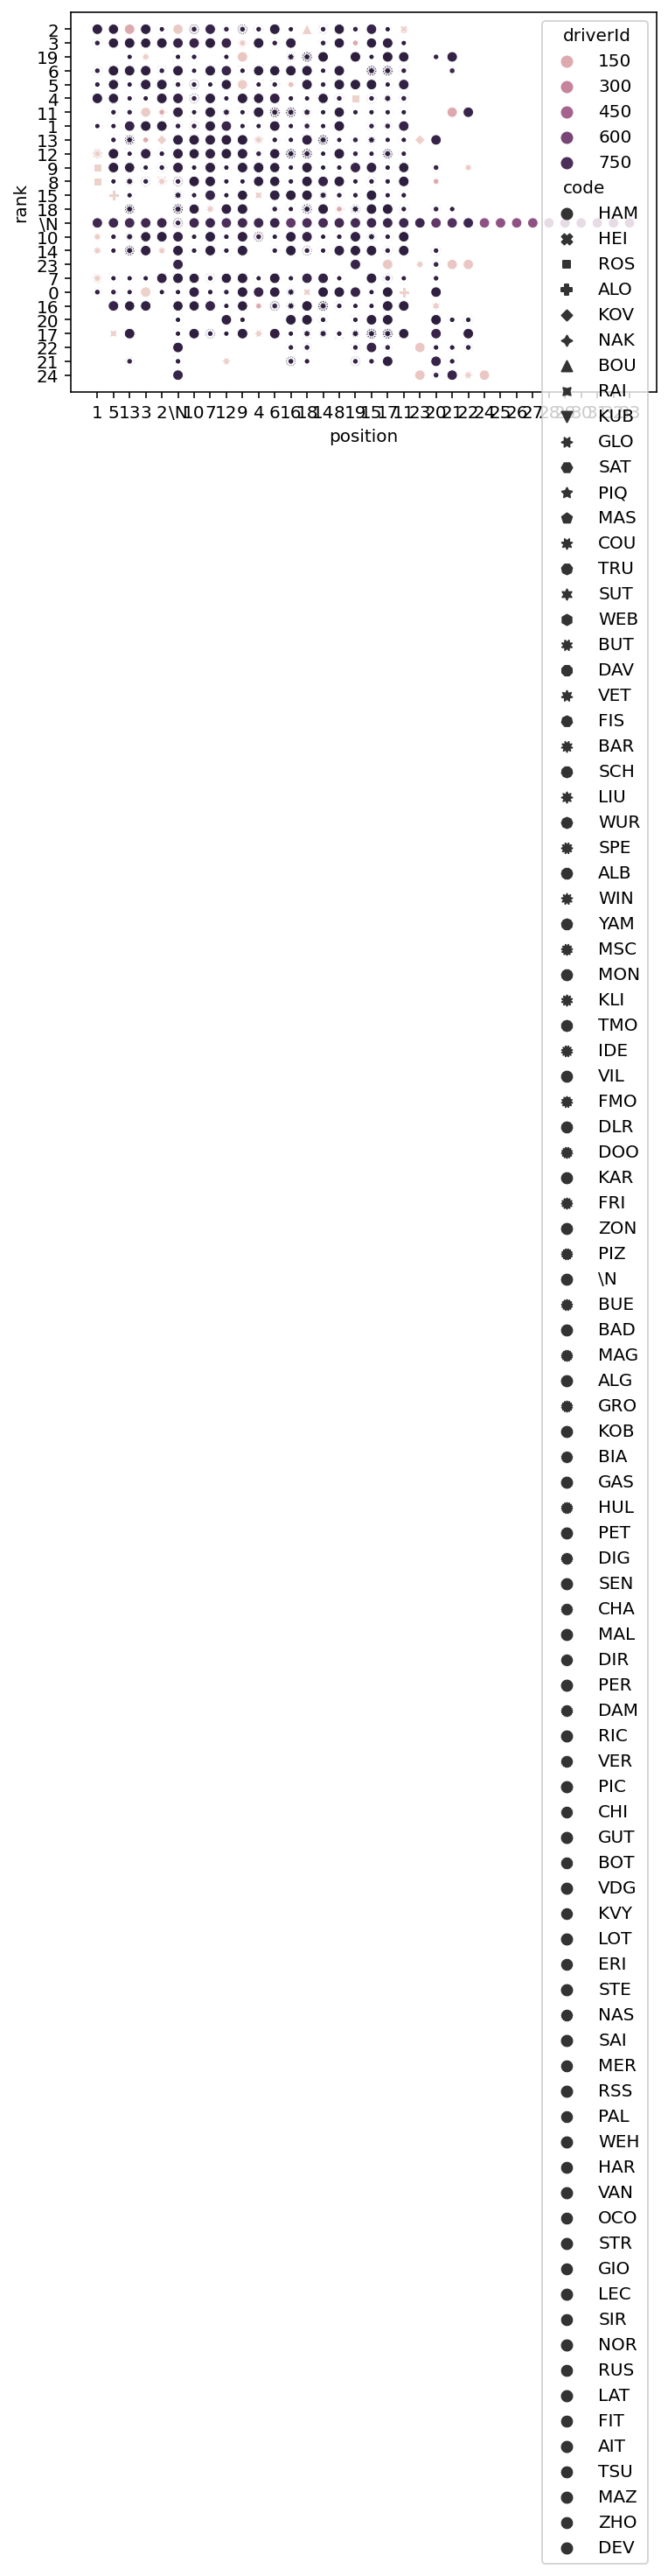

In [34]:
# scatter plot for top 5 drivers' trend change from position(start) to result(end) - not perfect
sns.scatterplot(data = driv_results, x = 'position', y = 'rank', hue = 'driverId', style = 'code')